In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.metrics import classification_report, roc_auc_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['figure.figsize'] = (4,2)

import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [117]:
df=pd.read_csv("employee_attrition.csv")
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


Text(0, 0.5, 'Percentage')

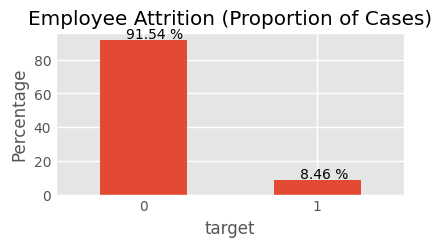

In [119]:

df['target'] = df.LastWorkingDate.notnull().astype(int)
df_plot = df['target'].value_counts(normalize=True) * 100
df_plot.plot.bar(rot=0, title='Employee Attrition (Proportion of Cases)')
for idx,val in enumerate(df_plot):
    plt.text(idx-0.1,val+1, '%.2f %%' %val)

plt.ylabel('Percentage')

In [120]:
df.Emp_ID.nunique(), df['MMM-YY'].min(),df['MMM-YY'].max()

(2381, '2016-01-01', '2017-12-01')

Text(0.5, 1.0, 'Age Distribution')

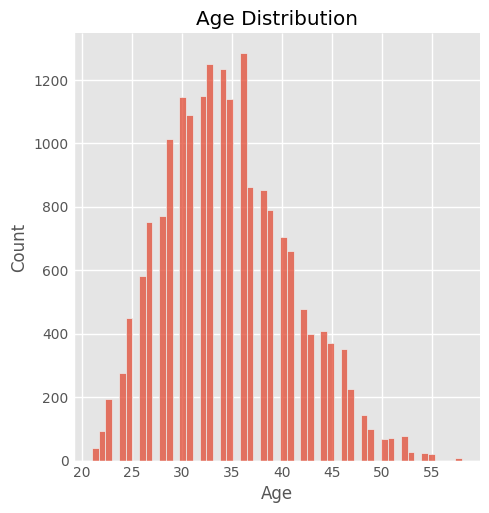

In [121]:
sns.displot(df.Age, kind='hist')
plt.title('Age Distribution')

In [122]:
print('The mean of the age is: %.2f and the median is: %i' %(df.Age.mean(),df.Age.median()))

The mean of the age is: 34.65 and the median is: 34


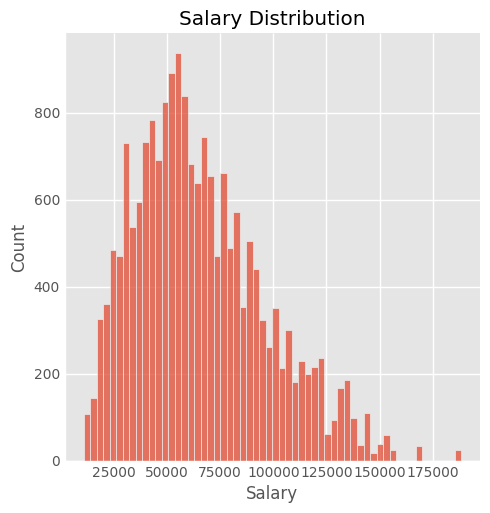

In [123]:
sns.displot(df.Salary, kind='hist')
plt.title('Salary Distribution');

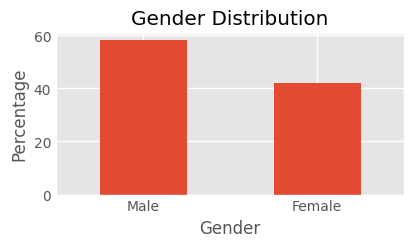

In [124]:
(df.Gender.value_counts(normalize=True)*100).plot.bar(rot=0, title='Gender Distribution')
plt.ylabel('Percentage');

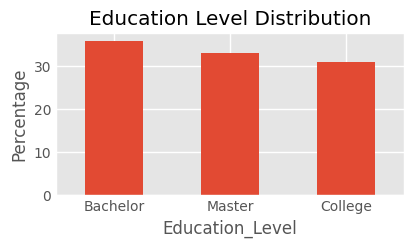

In [125]:
(df.Education_Level.value_counts(normalize=True)*100).plot.bar(rot=0, title='Education Level Distribution')
plt.ylabel('Percentage');

Number of unique cities: 29


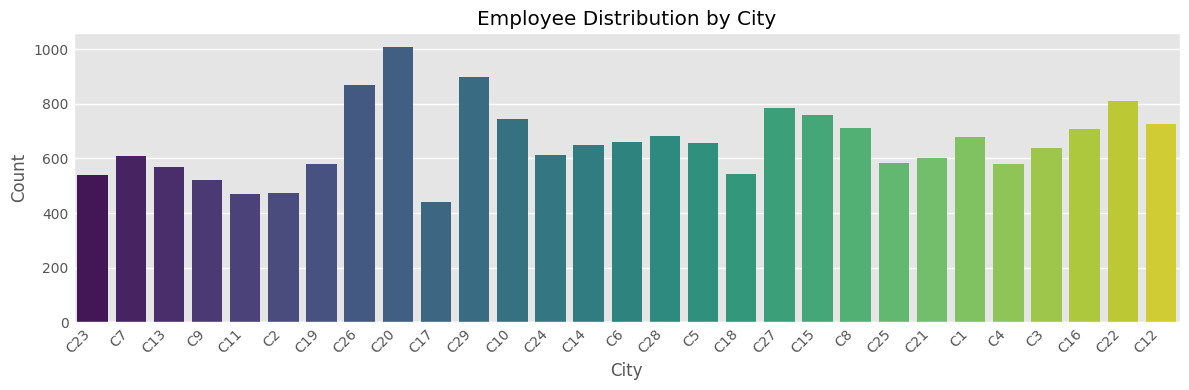

In [126]:
print("Number of unique cities:", df['City'].nunique())

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='City', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Employee Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [127]:
df.drop(['Joining Designation','Designation'],axis=1, inplace=True)

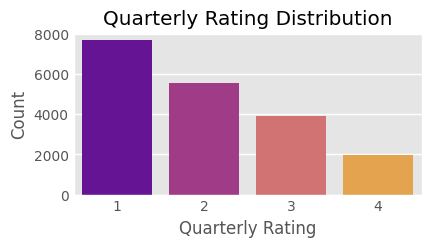

In [128]:
sns.countplot(data=df,x='Quarterly Rating', palette='plasma')
plt.title('Quarterly Rating Distribution')
plt.xlabel('Quarterly Rating')
plt.ylabel('Count')
plt.show()

In [129]:
df.groupby('target')['Quarterly Rating'].value_counts().unstack()

Quarterly Rating,1,2,3,4
target,,,,
0,6247,5407,3867,1967
1,1432,146,28,10


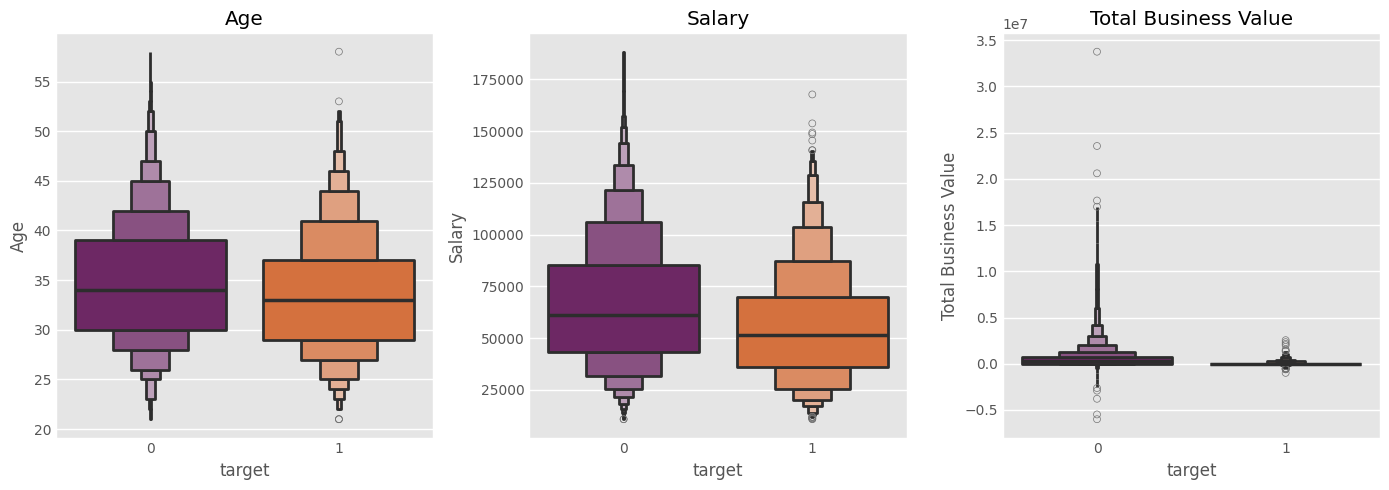

In [130]:
cat_cols = ['Gender','City','Education_Level']
num_cols = ['Age','Salary', 'Total Business Value']
plt.figure(figsize=(14,5))
for idx,col in enumerate(num_cols):
    df_temp = df[['target']+[col]]
    plt.subplot(1,3,idx+1)
    sns.boxenplot(data=df_temp,x='target',y=col, palette='inferno')
    plt.title(col)
    plt.tight_layout()

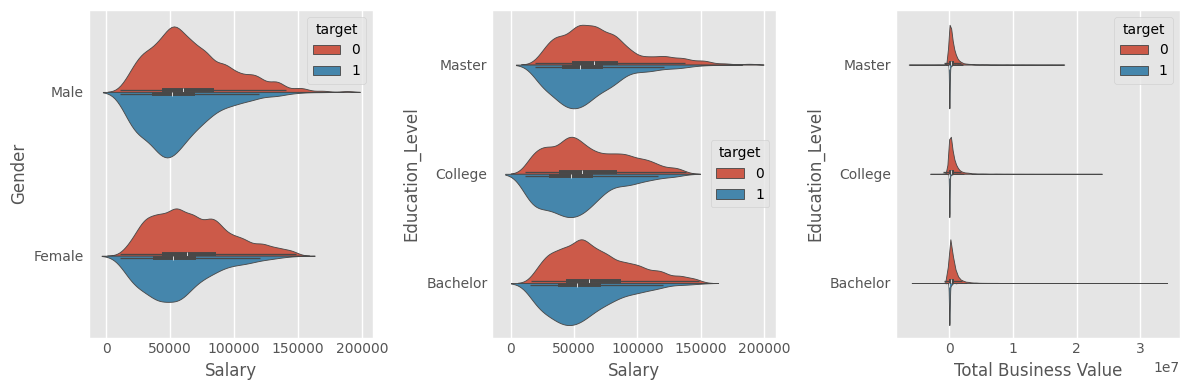

In [131]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.violinplot(data=df, y='Gender', x='Salary', hue='target', split=True, scale='count')
plt.subplot(1,3,2)
sns.violinplot(data=df, y='Education_Level', x='Salary', hue='target', split=True, scale='count')
plt.subplot(1,3,3)
sns.violinplot(data=df, y='Education_Level', x='Total Business Value', hue='target', split=True, scale='count')
plt.tight_layout()

In [132]:
df_join = df.groupby('Emp_ID').City.shift().fillna(method='backfill')

df_join.name = 'city_2'
df = df.join(df_join)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,target,city_2
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,2381060,2,0,C23
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,-665480,2,0,C23
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,0,2,1,C23
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,0,1,0,C7
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,0,1,0,C7


In [133]:
df['moved_out'] = np.where(df.City == df.city_2, 0,1)
df.drop('city_2', axis=1, inplace=True)
df['moved_out'].value_counts(normalize=True), df.groupby('target').moved_out.mean()

(moved_out
 0    0.990735
 1    0.009265
 Name: proportion, dtype: float64,
 target
 0    0.004403
 1    0.061881
 Name: moved_out, dtype: float64)

In [134]:
df_join = df.groupby('Emp_ID').Education_Level.shift().fillna(method='backfill')

df_join.name = 'education_level_2'
df = df.join(df_join)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,target,moved_out,education_level_2
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,2381060,2,0,0,Master
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,-665480,2,0,0,Master
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,0,2,1,0,Master
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,0,1,0,0,Master
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,0,1,0,0,Master


In [135]:
df['change_education'] = np.where(df.Education_Level == df.education_level_2, 0,1)
df.drop('education_level_2', axis=1, inplace=True)
df['change_education'].value_counts(normalize=True), df.groupby('target').change_education.mean()

(change_education
 0    0.993562
 1    0.006438
 Name: proportion, dtype: float64,
 target
 0    0.002973
 1    0.043936
 Name: change_education, dtype: float64)

In [136]:
df_join = df.groupby('Emp_ID').Salary.shift()
df_join.name = 'salary_2'
df = df.join(df_join)
df['emp_id_2'] = df['Emp_ID'].shift()

In [137]:
df[['Emp_ID','Salary']] = df[['Emp_ID','Salary']].astype(float)

In [138]:
df['temp'] = np.where(df.Salary == df.salary_2, 1, 0)
df['month_same_salary'] = df.groupby(['Emp_ID','Salary']).temp.cumsum()
df.drop(['salary_2','temp'], axis=1, inplace=True)

In [139]:
df.at[4012,'month_same_salary'] = 0
df[df.Emp_ID ==  582]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,target,moved_out,change_education,emp_id_2,month_same_salary
3999,2016-11-01,582.0,32,Female,C10,Master,47682.0,2016-11-25,NaN,0,1,0,0,0,581.0,0
4000,2016-12-01,582.0,32,Female,C10,Master,47682.0,2016-11-25,NaN,0,1,0,0,0,582.0,1
4001,2017-01-01,582.0,32,Female,C10,Master,47682.0,2016-11-25,NaN,0,2,0,0,0,582.0,2
4002,2017-02-01,582.0,32,Female,C10,Master,47682.0,2016-11-25,NaN,2750560,2,0,0,0,582.0,3
4003,2017-03-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,500000,2,0,0,0,582.0,4
4004,2017-04-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,10703580,4,0,0,0,582.0,5
4005,2017-05-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,2000000,4,0,0,0,582.0,6
4006,2017-06-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,1000000,4,0,0,0,582.0,7
4007,2017-07-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,2658210,4,0,0,0,582.0,8
4008,2017-08-01,582.0,33,Female,C10,Master,47682.0,2016-11-25,NaN,2212780,4,0,0,0,582.0,9


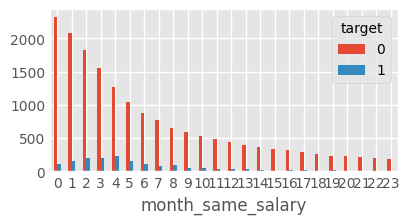

In [140]:
pd.crosstab(df.target, df.month_same_salary).T.plot.bar(rot=0);

In [141]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['month_joining'] = df['Dateofjoining'].dt.month
df['year_joining'] = df['Dateofjoining'].dt.year

In [142]:
cat_cols = cat_cols + ['month_joining','year_joining']
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [143]:
num_cols = [col for col in df.select_dtypes(include='number').columns if col not in ['Emp_ID','target','emp_id_2']]
std_cols = ['Age', 'Salary','Total Business Value']
cat_cols = [col for col in num_cols if col not in std_cols]

In [144]:
Xtrain,Xtest, ytrain, ytest = train_test_split(df[num_cols], df.target, test_size=0.2, random_state = 8)

In [145]:
count_class_0, count_class_1 = ytrain.value_counts()

In [146]:
x_data_majority = Xtrain.loc[ytrain == 0]
y_data_majority = ytrain.loc[ytrain == 0]

x_data_minority = Xtrain.loc[ytrain == 1]
y_data_minority = ytrain.loc[ytrain == 1]

In [147]:
y_df_major_downsampled = y_data_majority.sample(n = count_class_1, random_state=8)
x_df_major_downsampled = x_data_majority.loc[y_df_major_downsampled.index]

In [148]:
y_data_downsampled = pd.concat([y_df_major_downsampled, y_data_minority])
x_data_downsampled = pd.concat([x_df_major_downsampled, x_data_minority])

In [149]:
def grid_fit_cv(model, param_grid,stand_cols, stand=False, cv=10):

    def stand_feat(df_temp):
        ss = StandardScaler()
        idx = df_temp.index
        df_temp_ss = pd.DataFrame(ss.fit_transform(df_temp[stand_cols]), columns=stand_cols, index=idx)
        df_temp_all = pd.concat([df_temp_ss, df_temp[cat_cols]],1)

        return df_temp_all

    print('Preparing the data')
    if stand:
        transformer = FunctionTransformer(stand_feat)
        pipe = Pipeline(steps=[('stand', transformer), ('model',model)])
    else:
        print('Ok, not necesary')
        pipe = Pipeline(steps=[('model',model)])

    print('Time to create the GridSearch')
    clf = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=1, cv=cv)

    clf.fit(x_data_downsampled, y=y_data_downsampled)
    print(clf.best_score_, clf.best_params_)

    y_pred = clf.predict(Xtest)
    print(classification_report(ytest, y_pred))

    return clf

In [150]:
%%time

param_grid = {'model__max_depth':np.arange(1,12),'model__criterion':['entropy','gini']}
dt_model = grid_fit_cv(DecisionTreeClassifier(), param_grid, std_cols,stand=False)

Preparing the data
Ok, not necesary
Time to create the GridSearch
Fitting 10 folds for each of 22 candidates, totalling 220 fits
0.8330739299610894 {'model__criterion': 'gini', 'model__max_depth': np.int64(4)}
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      3490
           1       0.26      0.86      0.40       331

    accuracy                           0.78      3821
   macro avg       0.62      0.82      0.63      3821
weighted avg       0.92      0.78      0.82      3821

CPU times: user 168 ms, sys: 8.04 ms, total: 176 ms
Wall time: 1.76 s


In [151]:
%%time

param_grid = {'model__n_estimators': np.linspace(300,600,10).astype(int), }
rf_model = grid_fit_cv(RandomForestClassifier(criterion='gini', max_depth=9), param_grid, std_cols, cv=5)

Preparing the data
Ok, not necesary
Time to create the GridSearch
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8381322957198444 {'model__n_estimators': np.int64(533)}
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3490
           1       0.28      0.85      0.43       331

    accuracy                           0.80      3821
   macro avg       0.63      0.83      0.65      3821
weighted avg       0.92      0.80      0.84      3821

CPU times: user 2.81 s, sys: 96.1 ms, total: 2.91 s
Wall time: 1min 8s


In [152]:
%%time

param_grid = {'model__n_estimators': np.linspace(1,100,5).astype(int),
              'model__learning_rate':np.linspace(1e-5,1,3),
             'model__max_depth':np.arange(1,4)}
gbm_model = grid_fit_cv(GradientBoostingClassifier(), param_grid, std_cols,cv=5)

Preparing the data
Ok, not necesary
Time to create the GridSearch
Fitting 5 folds for each of 45 candidates, totalling 225 fits
0.8377431906614786 {'model__learning_rate': np.float64(0.500005), 'model__max_depth': np.int64(1), 'model__n_estimators': np.int64(50)}
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      3490
           1       0.27      0.85      0.41       331

    accuracy                           0.79      3821
   macro avg       0.63      0.82      0.64      3821
weighted avg       0.92      0.79      0.83      3821

CPU times: user 632 ms, sys: 45.9 ms, total: 678 ms
Wall time: 31.9 s


<Axes: >

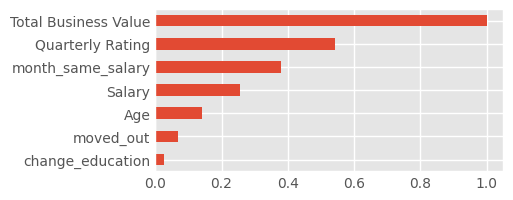

In [153]:
best_model = rf_model.best_estimator_.named_steps['model']
dict_importance = dict(zip(x_data_downsampled.columns, best_model.feature_importances_))
df_imp = (pd.Series(dict_importance).sort_values())/pd.Series(dict_importance).max()
df_imp.tail(10).plot.barh()

In [154]:
f_imp_sort = df_imp.tail(10).sort_values(ascending=False)
names = list(f_imp_sort.head(10).index)
feat = []
lista_casv = num_cols

for i in names:
    if i in lista_casv:
        feat.append(lista_casv.index(i))

In [156]:
df_att = df[df.target == 1]
df_att.head(2)

,MMM-YY,Emp_ID,Age,Salary,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,target,moved_out,...,month_joining_10,month_joining_11,month_joining_12,year_joining_2011,year_joining_2012,year_joining_2013,year_joining_2014,year_joining_2015,year_joining_2016,year_joining_2017
2,2016-03-01,1.0,28,57387.0,2015-12-24,2016-03-11,0,2,1,0,...,False,False,True,False,False,False,False,True,False,False
9,2017-04-01,4.0,43,65603.0,2016-12-07,2017-04-27,0,1,1,0,...,False,False,True,False,False,False,False,False,True,False


In [157]:
std = MinMaxScaler()
df_std = std.fit_transform(df_att[num_cols])
df_att2 = pd.DataFrame(df_std,columns=num_cols)
df_att2.head()

,Age,Salary,Total Business Value,Quarterly Rating,moved_out,change_education,month_same_salary
0,0.189189,0.297049,0.279729,0.333333,0.0,0.0,0.086957
1,0.594595,0.349377,0.279729,0.000000,0.0,0.0,0.173913
2,0.216216,0.226869,0.279729,0.000000,0.0,0.0,0.086957
3,0.351351,0.381559,0.279729,0.000000,0.0,0.0,0.086957
4,0.378378,0.110623,0.279729,0.000000,0.0,0.0,0.217391


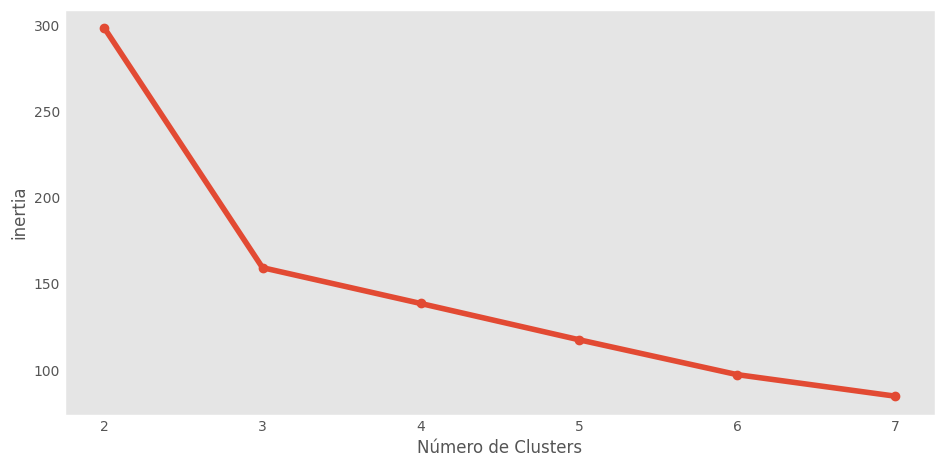

In [158]:
inertias = []
models = {}
ks = range(2, 8)
for k in ks:

    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(df_att2.values)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    models[k] = kmeans

plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel(u'Número de Clusters')
plt.ylabel(u'inertia')
plt.grid()
plt.xticks(ks);

In [159]:
kmeans3 = models[3]
df_att2['cluster'] = kmeans3.predict(df_att2)
df_att2.head()

,Age,Salary,Total Business Value,Quarterly Rating,moved_out,change_education,month_same_salary,cluster
0,0.189189,0.297049,0.279729,0.333333,0.0,0.0,0.086957,0
1,0.594595,0.349377,0.279729,0.000000,0.0,0.0,0.173913,0
2,0.216216,0.226869,0.279729,0.000000,0.0,0.0,0.086957,0
3,0.351351,0.381559,0.279729,0.000000,0.0,0.0,0.086957,0
4,0.378378,0.110623,0.279729,0.000000,0.0,0.0,0.217391,0


In [160]:
df_original = pd.read_csv('employee_attrition.csv')
df_cluster = df_att.merge(df_original, how='left', left_index=True, right_index=True, suffixes=('_x', ''))
df_cluster

,MMM-YY_x,Emp_ID_x,Age_x,Salary_x,Dateofjoining_x,LastWorkingDate_x,Total Business Value_x,Quarterly Rating_x,target,moved_out,...,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1.0,28,57387.0,2015-12-24,2016-03-11,0,2,1,0,...,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
9,2017-04-01,4.0,43,65603.0,2016-12-07,2017-04-27,0,1,1,0,...,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5.0,29,46368.0,2016-01-09,2016-03-07,0,1,1,0,...,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
20,2017-11-01,8.0,34,70656.0,2017-09-19,2017-11-15,0,1,1,0,...,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1
27,2016-12-01,12.0,35,28116.0,2016-06-29,2016-12-21,0,1,1,0,...,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779.0,28,95133.0,2017-01-26,2017-02-14,0,1,1,0,...,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1
19054,2016-08-01,2782.0,26,29582.0,2016-05-16,2016-08-16,0,1,1,0,...,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1
19081,2017-10-01,2785.0,34,12105.0,2017-08-28,2017-10-28,0,1,1,0,...,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
19090,2016-09-01,2786.0,45,35370.0,2015-07-31,2016-09-22,0,1,1,0,...,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1


In [161]:
df_att2.cluster

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
1611,0
1612,0
1613,0
1614,1


In [162]:
df_att2.index = df_att.index
df_cluster['cluster'] = df_att2.cluster
drop_cols = [col for col in df_cluster.columns if '_x' in col or 'City_'in col or 'Gender_'in col or 'month_' in col or 'year_' in col or 'Education_Level_' in col] + [
    'emp_id_2','MMM-YY','Emp_ID', 'target', 'Dateofjoining','LastWorkingDate','Joining Designation','Designation']
df_cluster.drop(drop_cols, axis=1, inplace=True)

<Axes: xlabel='cluster'>

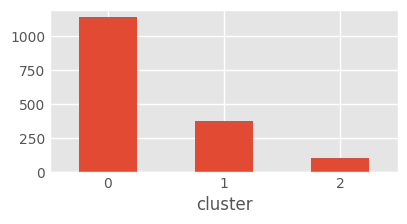

In [163]:
df_cluster.cluster.value_counts().plot.bar(rot=0)

In [164]:
n_col = ['Age', 'Salary','Total Business Value']

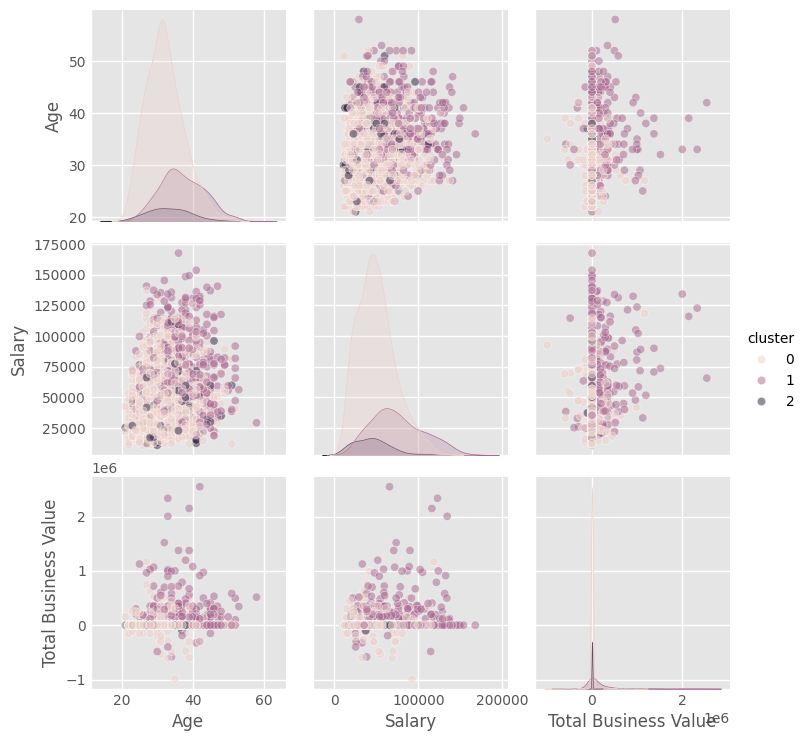

In [165]:
sns.pairplot(data = df_cluster[n_col+['cluster']], hue='cluster',plot_kws=dict(alpha=0.5))

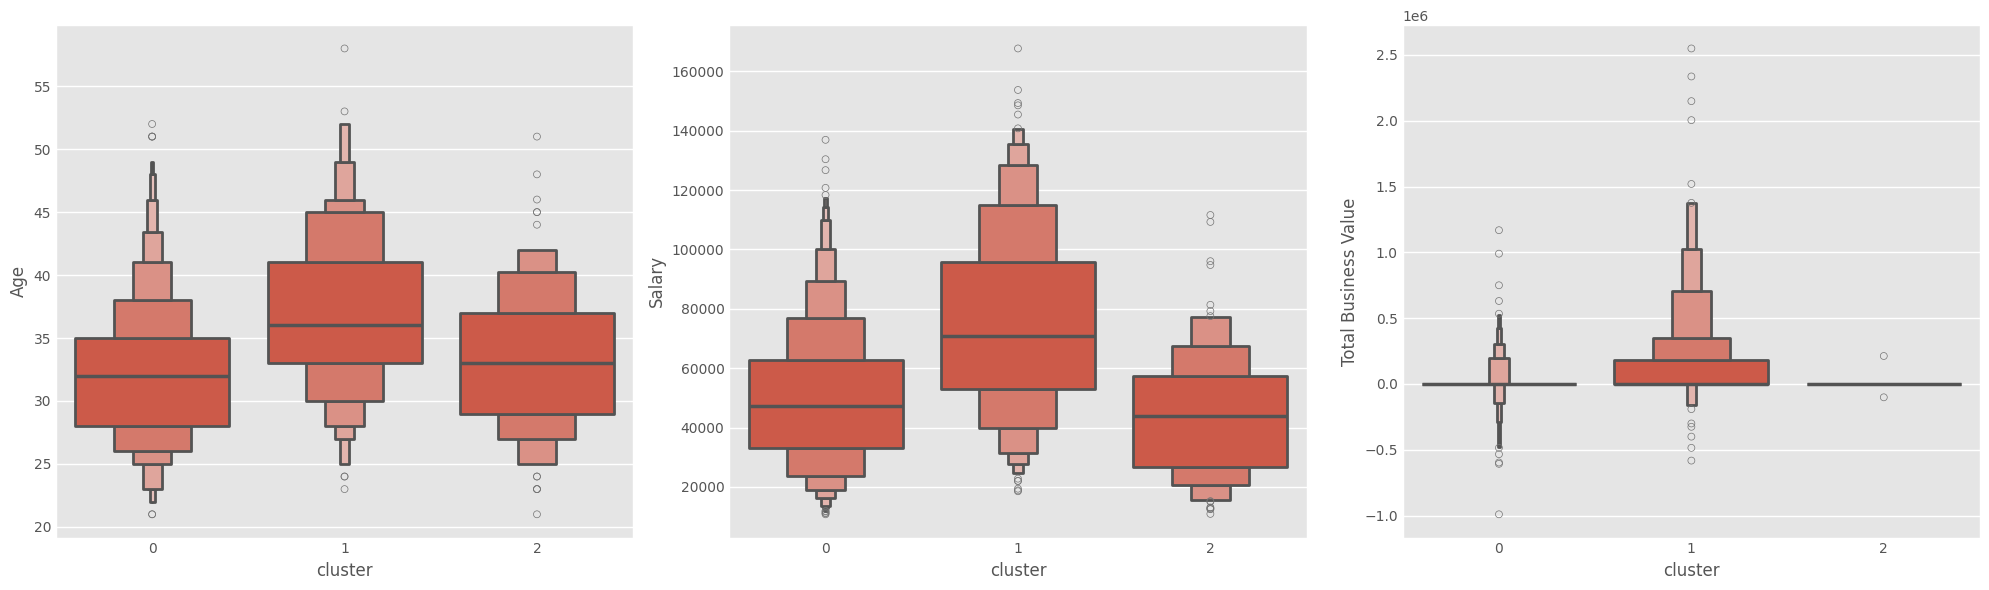

In [166]:
plt.figure(figsize=(20,6))
for idx,c in enumerate(n_col):
    plt.subplot(1,3,idx+1)
    sns.boxenplot(data=df_cluster, x='cluster', y=c)
    plt.tight_layout()

In [167]:
c_cols = ['moved_out', 'change_education','Gender', 'City',
       'Education_Level','Quarterly Rating']

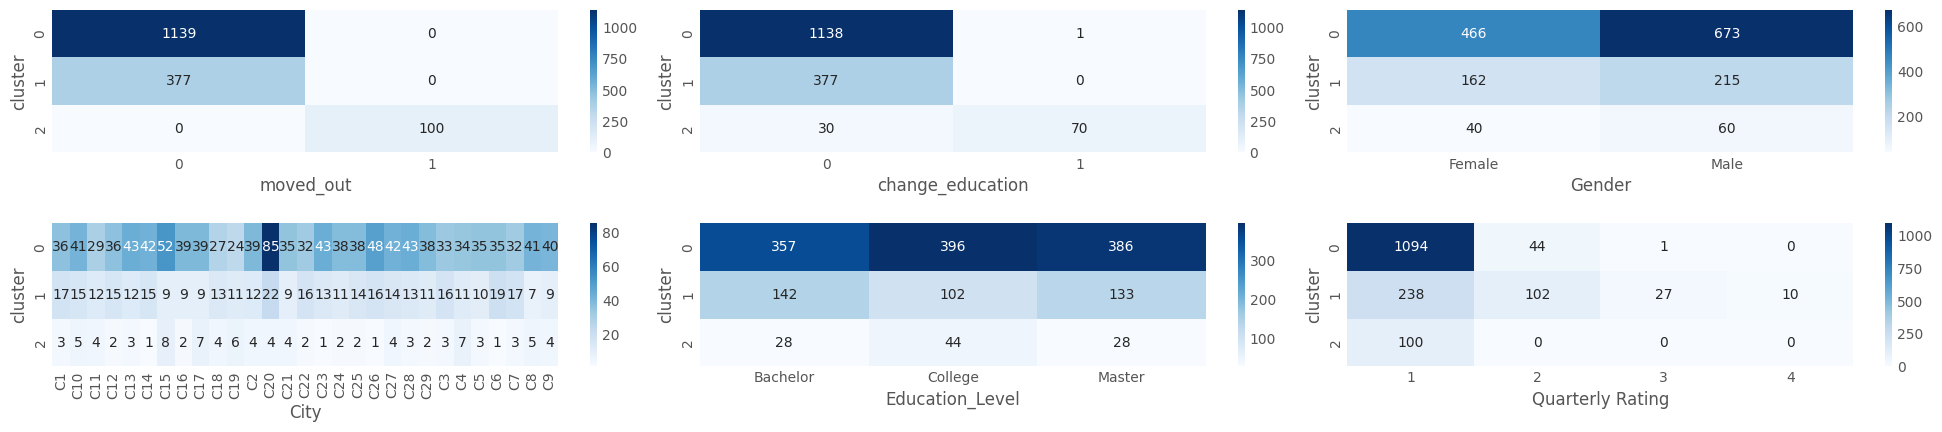

In [168]:
plt.figure(figsize=(20,6))
for idx,c in enumerate(c_cols):
    df_cross = pd.crosstab(df_cluster.cluster, df_cluster[c])
    plt.subplot(3,3,idx+1)
    sns.heatmap(df_cross, cmap='Blues', annot=True, fmt='0.0f')
    plt.tight_layout()